<a href="https://colab.research.google.com/github/SushilKokare/AtiNeu_Project/blob/keras.applications/KA_9_ResNet152V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications.resnet_v2 import ResNet152V2
from matplotlib import pyplot as plt

In [5]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

In [6]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [7]:

pathTrain  = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'

pathTest ='/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [8]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [10]:
base_model = ResNet152V2(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

234545216/234545216 [==============================] - 11s 0us/step


In [11]:
for layer in base_model.layers:
  layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
71/71 [==============================] - 1041s 14s/step - loss: 6.3345 - accuracy: 0.7077 - val_loss: 6.1437 - val_accuracy: 0.6560
Epoch 2/10
71/71 [==============================] - 22s 313ms/step - loss: 0.6467 - accuracy: 0.9200 - val_loss: 2.4431 - val_accuracy: 0.6880
Epoch 3/10
71/71 [==============================] - 21s 296ms/step - loss: 0.1406 - accuracy: 0.9725 - val_loss: 2.3256 - val_accuracy: 0.7960
Epoch 4/10
71/71 [==============================] - 22s 306ms/step - loss: 0.0873 - accuracy: 0.9787 - val_loss: 3.3341 - val_accuracy: 0.7360
Epoch 5/10
71/71 [==============================] - 22s 311ms/step - loss: 0.1312 - accuracy: 0.9782 - val_loss: 2.3878 - val_accuracy: 0.7840
Epoch 6/10
71/71 [==============================] - 21s 294ms/step - loss: 0.0772 - accuracy: 0.9849 - val_loss: 3.5901 - val_accuracy: 0.7400
Epoch 7/10
71/71 [==============================] - 22s 311ms/step - loss: 0.0465 - accuracy: 0.9898 - val_loss: 3.5491 - val_accuracy: 0.7480

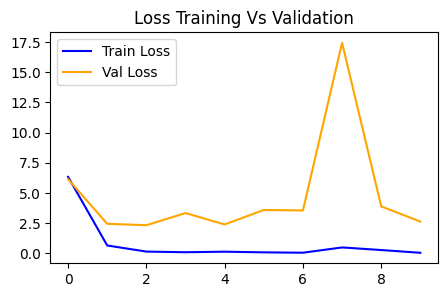

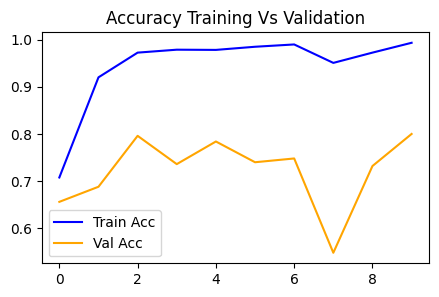

In [12]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

show_result(history)